In [40]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
%load_ext line_profiler
%load_ext memory_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [42]:
varinfo.clear()

In [43]:
module = fc.eightb.preselection.t8btag_minmass
dout = "yy_quadh"

In [44]:
altfile="yy_quadh_bkg10_soft025_md_allsig_{base}"
altfile="yy_quadh_bkg10_soft025_md_{base}"

# signal = ObjIter([])
# signal = ObjIter([ Tree(f, report=False, altfile=altfile) for f in tqdm(module.signal_list) ])
signal = ObjIter([ Tree(f, report=False, altfile=altfile) for f in tqdm(module.full_signal_list) ])

# bkg = ObjIter([])
bkg = ObjIter([ Tree(module.Run2_UL18.QCD_B_List, altfile=altfile), Tree(module.Run2_UL18.TTJets, altfile=altfile)])

data = ObjIter([])
# data = ObjIter([ Tree(module.Run2_UL18.JetHT_Data_UL_List) ])

100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


In [45]:
analysis = Analysis.__subclasses__()[4](
    signal=signal, bkg=bkg, data=data,
    sr_r=0.5, cr_r=1.0,
    use_signal=[0,-2,-1]
)

In [46]:
analysis.run(runlist=['build_abcd'])

[running] reweight_bkg
[running] jet_kin_cuts
[skipping] plot_ranker
[skipping] plot_t8btag_signal
[skipping] plot_eightb_signal
[skipping] plot_assigned_jet_kin
[skipping] plot_assigned_higgs_kin
[skipping] plot_assigned_y_kin
[skipping] plot_x_kin
[running] build_higgs_dm
Optimization terminated successfully.
         Current function value: 0.931525
         Iterations: 55
         Function evaluations: 145
[131.87 124.46 123.84 120.3 ]
[skipping] plot_assigned_higgs_m
[skipping] plot_y_higgs_m
[skipping] plot_abcd_variables
[running] build_abcd
[skipping] plot_abcd_regions
[skipping] var_correlations
[skipping] plot_vr_datamc
[skipping] train_vr_bdt
[skipping] train_ar_bdt
[skipping] calc_limits
[skipping] calc_brazil


In [47]:
signal = analysis.signal 
bkg = analysis.bkg

100%|██████████| 2/2 [00:00<00:00,  3.32it/s]


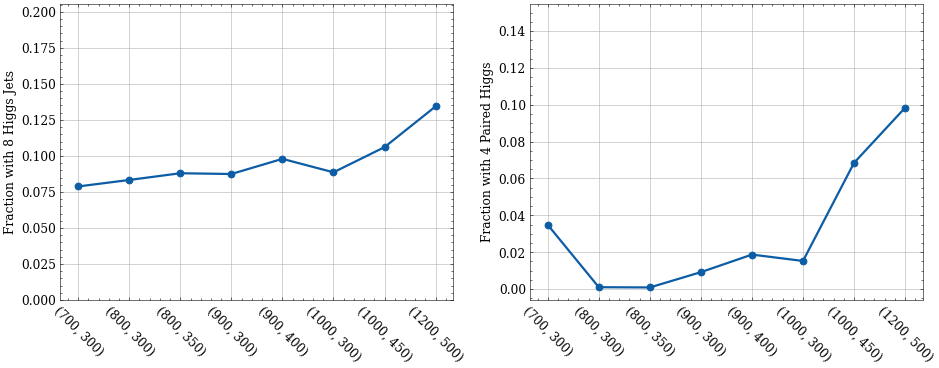

In [48]:
study.statsplot(
    signal,
    # masks=analysis.ar_bdt.mask,
    varlist=['nfound_select','nfound_paired_h'],
    xlabels=['Fraction with 8 Higgs Jets', 'Fraction with 4 Paired Higgs'],
    label=signal.mass.list,
    efficiency=True, 
    stat=lambda h:h.histo[-1],
    g_grid=True, 
    # g_ylim=(0,0.25)
)

In [49]:
eightb_tree = signal.apply(EventFilter('eightb', filter=lambda t: t.nfound_select==8))

100%|██████████| 1/1 [00:00<00:00,  1.60it/s]


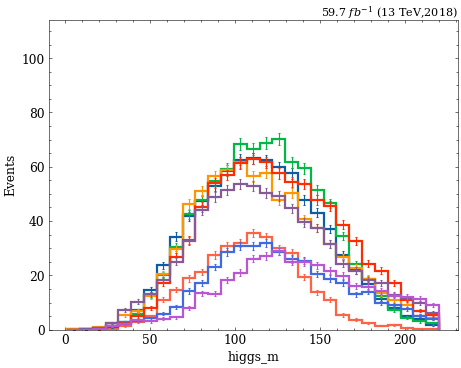

In [52]:
study.quick(
    eightb_tree,
    indices=lambda t:t.higgs_signalId==-1,
    varlist=['higgs_m'],

)

<Array [[4, 1, 6, 3], [4, ... 6], [0, 4, 2, 6]] type='38368 * var * int32'>

100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


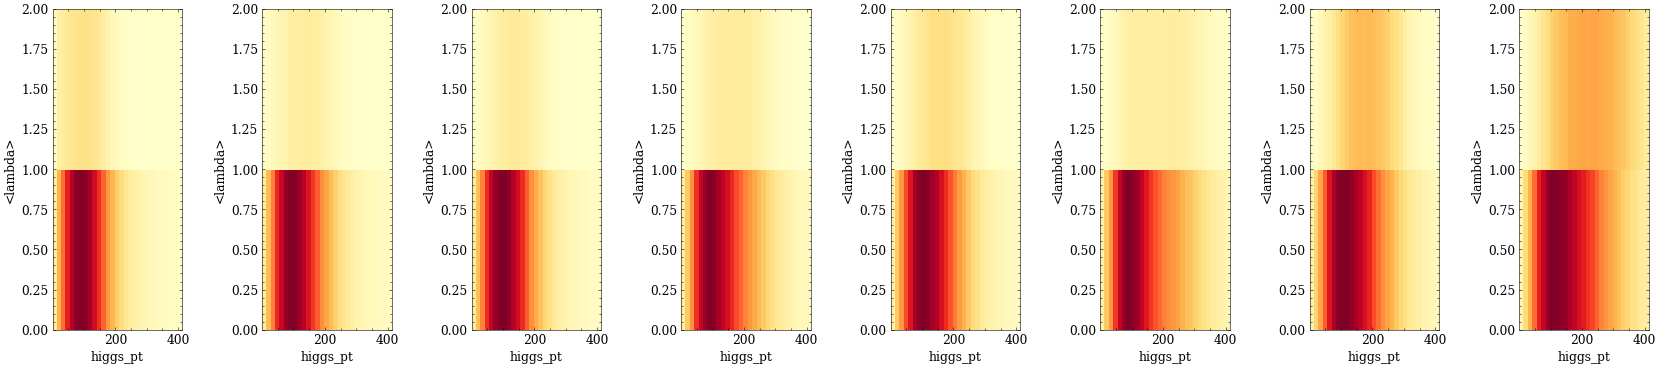

In [71]:
study.quick2d(
    signal,
    varlist=['higgs_pt',(lambda t:1*(t.higgs_signalId>=0))],
    efficiency=True,
)

100%|██████████| 1/1 [00:03<00:00,  3.58s/it]


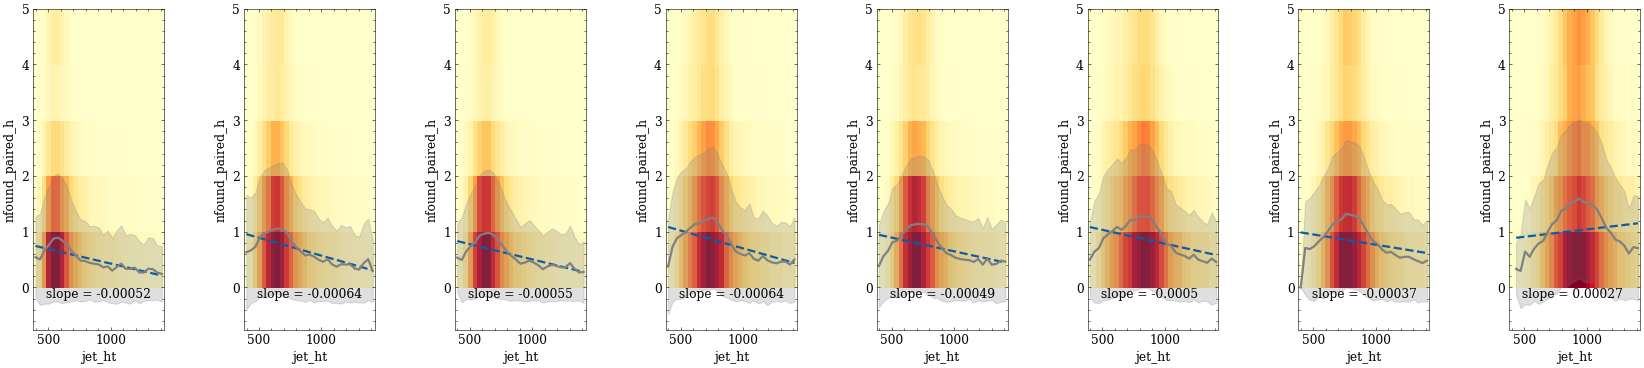

In [23]:
study.quick2d(
    signal,
    varlist=['jet_ht','nfound_paired_h'],
    exe=[
        plot_histo2d_x_corr,
    #     plot_histo2d_y_corr,st
    ]

)

100%|██████████| 2/2 [00:00<00:00,  7.38it/s]


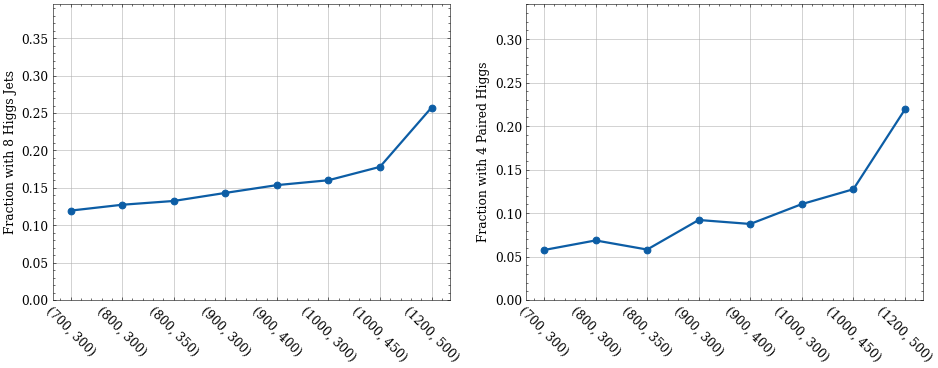

In [24]:
study.statsplot(
    signal,
    masks=analysis.ar_bdt.a,
    varlist=['nfound_select','nfound_paired_h'],
    xlabels=['Fraction with 8 Higgs Jets', 'Fraction with 4 Paired Higgs'],
    label=signal.mass.list,
    efficiency=True, 
    stat=lambda h:h.histo[-1],
    g_grid=True, 
    # g_ylim=(0,0.25)
)

100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


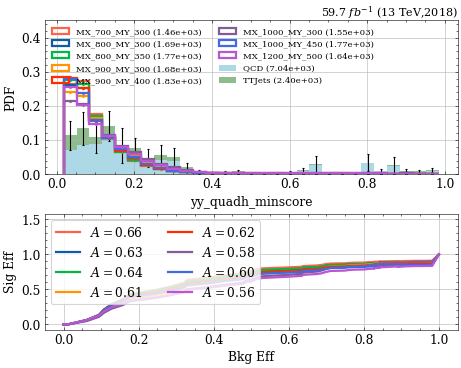

In [42]:
study.quick(
    signal+bkg,
    # legend=True, legend_ncol=2, legend_fontsize='x-small',
    legend=dict(ncol=2, fontsize='x-small'),
    masks=analysis.ar_bdt.a,
    varlist=['yy_quadh_minscore'],
    efficiency=True, grid=True,
    **study.auroc,
    e_c_legend_ncol=2,
)

100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


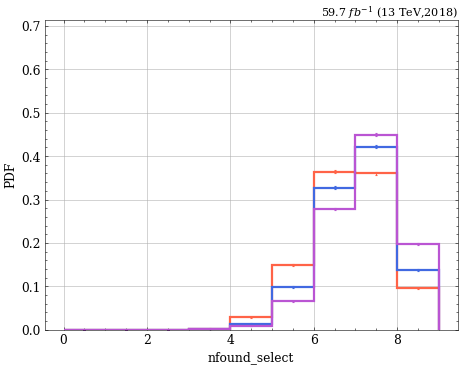

In [50]:
study.quick(
    signal,
    masks=analysis.ar_bdt.mask,
    varlist=['nfound_select'],
    efficiency=True, grid=True,
)

100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


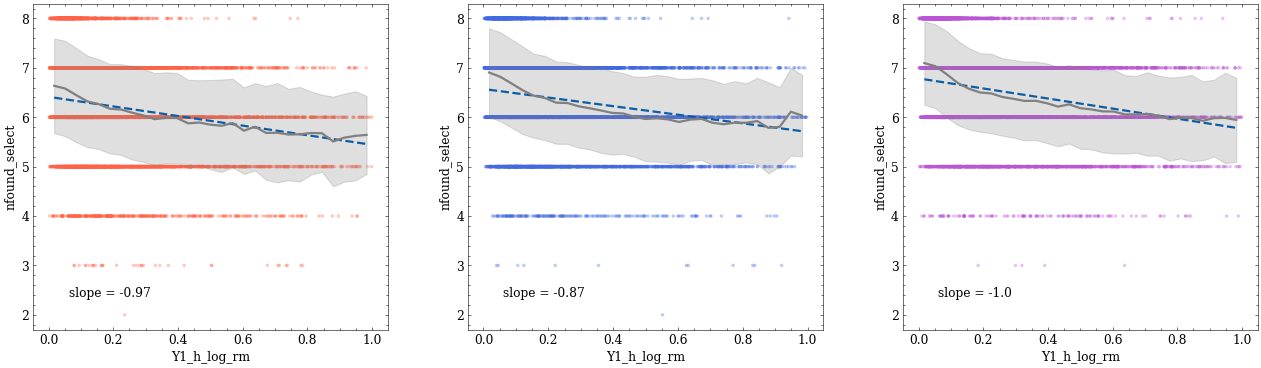

In [38]:
study.quick2d(
    signal,
    varlist=['Y1_h_log_rm','nfound_select'],
    binlist=[(0,1,30)],
    # contour=True,
    scatter=True,
    exe=plot_histo2d_x_corr,
)